### Question 1.4 Fractals through Newton-Raphson
#### Function Definitions
The function and its derivative have been defined below:

In [1]:
using LinearAlgebra
# using Plots
using PyCall
using PyPlot
using DataFrames
using CSV
# plotlyjs()

In [6]:
matplotlib.use("TkAgg")

In [2]:
function f(z::Complex)
    z^3-1
end

function f′(z::Complex)
    3z^2
end

f′ (generic function with 1 method)

#### a. Complex Types
In Julia, complex numbers can be written in the form `A+Bim`where `A` and `B`are the real and imaginary part of the complex number. The imaginary part is appended with `im`. Most mathematical operations operate normally on complex numbers. 
<br>
The absolute value can be calculated by `abs()` and the argument by `angle()`

#### b. Newton Raphson Method for Complex Numbers
The newton raphson method was easy to adopt for complex numbers. Here, we have the iteration scheme: <br>
$z_{n+1}=z_n-\frac{f(z)}{f^\prime(z)}$<br>

We keep iterating will the change in $|z|$ is less than $\epsilon$ or we have run out of steps $M$

In [15]:
function Newton_Raphson_Complex(f::Function,f′::Function,z::Complex,ϵ;verbose=false,kill_time=1e10,Max_iter=NaN)
    st = time_ns()
    i=0
    zᵢ=[]
    z1=z+2ϵ
    if f(z)≠0
        while abs((z-z1))>abs(ϵ)
            i=i+1

            if (time_ns()-st)>kill_time
                println("TIMEOUT! Did not converge for the given precision OR initial guess")
                return NaN,NaN
            elseif Max_iter<i
                println("Did not converge for the given precision OR initial guess after ",Max_iter," iterations")
                return NaN,i
            end
            z1 = z
            z = z - f(z)/f′(z)
            
            if verbose
                print("Iteration: ",i)
                println(" Current root: ",z)
            end
            zᵢ=[zᵢ;z]

        end
    end
    if verbose
        return z,zᵢ,i
    end
    return z,i
end

Newton_Raphson_Complex (generic function with 1 method)

In [16]:
rt,i=Newton_Raphson_Complex(f,f′,1+1im,0.001+0.001im)
print("Root found at: ",rt, "\nValue of function at root: ",f(rt))
print("\nNumber of iterations: ",i)

Root found at: 1.0000000089100063 - 2.5568132902702742e-8im
Value of function at root: 2.6730017088638647e-8 - 7.670440007498156e-8im
Number of iterations: 7

#### c. Fractals in Newton Raphson Solutions

For a $400x400$ grid defined by $|x|<2$ and $|y|<2$ we find the solution for each point. We start with $\epsilon=1e-9,~ M=200$ and $N=400$

In [11]:
function Sol_n_Grid(G::Matrix{Complex},f::Function,f′::Function,ϵ,M;verbose=false)
    solns=zeros(Complex,size(G))
    iters=zeros(size(G))
    for i in 1:size(G)[1]
        for j in 1:size(G)[2]
            if verbose
                print("Solving for G[",i,',',j,']')
                
            end
            rt,iter = Newton_Raphson_Complex(f,f′,G[i,j],ϵ,Max_iter=M)

            solns[i,j]=rt
            iters[i,j]=iter
        end
    end

    return solns,iters
end

Sol_n_Grid (generic function with 1 method)

In [12]:
# Building the grid of initial values
G=zeros(Complex,(400,400))
imrange=LinRange(-2im,2im,400)
rerange=LinRange(-2,2,400)

for i in 1:400
    for j in 1:400
        G[i,j]=rerange[j]+imrange[400-i+1]
    end
end
G

400×400 Matrix{Complex}:
 -2.0+2.0im      -1.98997+2.0im      …  1.98997+2.0im      2.0+2.0im
 -2.0+1.98997im  -1.98997+1.98997im     1.98997+1.98997im  2.0+1.98997im
 -2.0+1.97995im  -1.98997+1.97995im     1.98997+1.97995im  2.0+1.97995im
 -2.0+1.96992im  -1.98997+1.96992im     1.98997+1.96992im  2.0+1.96992im
 -2.0+1.9599im   -1.98997+1.9599im      1.98997+1.9599im   2.0+1.9599im
 -2.0+1.94987im  -1.98997+1.94987im  …  1.98997+1.94987im  2.0+1.94987im
 -2.0+1.93985im  -1.98997+1.93985im     1.98997+1.93985im  2.0+1.93985im
 -2.0+1.92982im  -1.98997+1.92982im     1.98997+1.92982im  2.0+1.92982im
 -2.0+1.9198im   -1.98997+1.9198im      1.98997+1.9198im   2.0+1.9198im
 -2.0+1.90977im  -1.98997+1.90977im     1.98997+1.90977im  2.0+1.90977im
     ⋮                               ⋱                     
 -2.0-1.9198im   -1.98997-1.9198im      1.98997-1.9198im   2.0-1.9198im
 -2.0-1.92982im  -1.98997-1.92982im     1.98997-1.92982im  2.0-1.92982im
 -2.0-1.93985im  -1.98997-1.93985im     1.9899

In [17]:
#Finding solutions over the entire grid
solns,iters=Sol_n_Grid(G,f,f′,1e-9,200,verbose=false);

#### 4. Saving Solutions at Each Point in a Dataframe
The dataframe has been saved as `NR_C_e1e9_M200.csv`. 
###### I chose to save number of iterations instead of log iterations since there weren't as many iterations in my run
<br> 

Link: [text](NR_C_e1e9_M200.csv)

In [18]:
df=DataFrame("xₒ" => Float64[], "yₒ" => Float64[],"k(z)" => Complex[],"f(z)"=>Complex[],"iterations"=>Float64[]);

In [19]:
for i in 1:400
    for j in 1:400
        push!(df,Any[real(G[i,j]),imag(G[i,j]),solns[i,j],f(solns[i,j]),(iters[i,j])])
        
    end
end

In [10]:
df

Row,xₒ,yₒ,k(z),f(z),iterations
,Float64,Float64,Complex,Complex,Float64
1,-2.0,2.0,-0.5+0.866025im,2.22045e-16-1.11022e-16im,8.0
2,-1.98997,2.0,-0.5+0.866025im,2.22045e-16-1.11022e-16im,8.0
3,-1.97995,2.0,-0.5+0.866025im,-2.22045e-16+1.11022e-16im,8.0
4,-1.96992,2.0,-0.5+0.866025im,-2.22045e-16+1.11022e-16im,8.0
5,-1.9599,2.0,-0.5+0.866025im,-2.22045e-16+1.11022e-16im,8.0
6,-1.94987,2.0,-0.5+0.866025im,-2.22045e-16+1.11022e-16im,8.0
7,-1.93985,2.0,-0.5+0.866025im,-2.22045e-16+1.11022e-16im,8.0
8,-1.92982,2.0,-0.5+0.866025im,2.22045e-16-1.11022e-16im,8.0
9,-1.9198,2.0,-0.5+0.866025im,2.22045e-16-1.11022e-16im,8.0


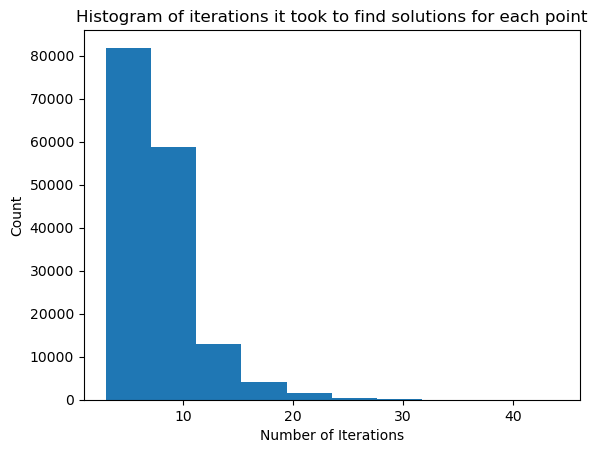

In [30]:
PyPlot.close()
hist(df[!,5],bins=10)
plt.title("Histogram of iterations it took to find solutions for each point")
plt.ylabel("Count")
plt.xlabel("Number of Iterations")
gcf()
# show()

In [10]:
CSV.write("./NR_C_e1e9_M200.csv",df)

"./NR_C_e1e9_M200.csv"

#### 5. Plotting Fractals
The imaginary part of the solution is plotted in the complex plane. Interesting figures are saved as:
1. E1e9_M200_Full.png<br>
2. E1e9_M200_Zoom1.png<br>
3. E1e9_M200_Zoom2.png<br>

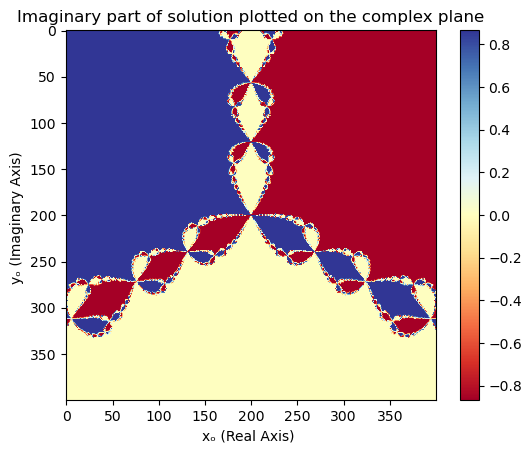

In [31]:
PyPlot.close()
imshow( reshape(imag.(df[!,3]),(400,400)),cmap="RdYlBu")
xlabel("xₒ (Real Axis) ")
ylabel("yₒ (Imaginary Axis) ")
title("Imaginary part of solution plotted on the complex plane")
colorbar()
gcf()
# show()

#### 5. Plotting Number of Iterations
The iterations it took to solve the equations is plotted in the complex plane. Interesting figures are saved as:
1. Iter_E1e9_M200_Full.png<br>
2. Iter_E1e9_M200_Zoom1.png<br>
3. Iter_E1e9_M200_Zoom_Centre.png<br>

The solver converges for all points, but we can see that the number of iterations it takes to converge peaks at the fractal boundaries (20-40 iterations, when on average it takes 7-10 iterations)

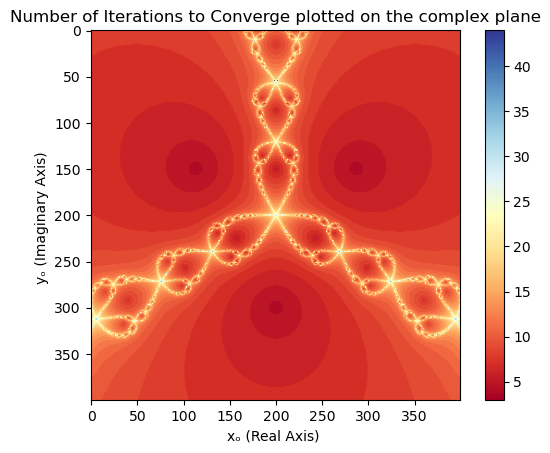

In [37]:
PyPlot.close()
imshow( reshape((df[!,5]),(400,400)),cmap="RdYlBu")
xlabel("xₒ (Real Axis) ")
ylabel("yₒ (Imaginary Axis) ")
title("Number of Iterations to Converge plotted on the complex plane")
colorbar()
gcf()
# show()

### 2. Understanding Convergence and Sensitivities of Newton Raphson

In [35]:
function g(z::Complex)
    35z^9 - 180z^7 + 378z^5 - 420z^3 + 315z
end

function g′(z::Complex)
    315z^8 - 1260z^6 + 1890z^4 - 1260z^2 + 315
end

g′ (generic function with 1 method)

In [36]:
solns2,iters2=Sol_n_Grid(G,g,g′,1e-9,200,verbose=false);

Did not converge for the given precision OR initial guess after 200 iterations
Did not converge for the given precision OR initial guess after 200 iterations
Did not converge for the given precision OR initial guess after 200 iterations
Did not converge for the given precision OR initial guess after 200 iterations


In [39]:
df2=DataFrame("xₒ" => Float64[], "yₒ" => Float64[],"k(z)" => Complex[],"f(z)"=>Complex[],"iterations"=>Float64[]);


In [40]:
for i in 1:400
    for j in 1:400
        push!(df2,Any[real(G[i,j]),imag(G[i,j]),solns2[i,j],f(solns2[i,j]),(iters2[i,j])])
        
    end
end

In [41]:
df2

Row,xₒ,yₒ,k(z),f(z),iterations
,Float64,Float64,Complex,Complex,Float64
1,-2.0,2.0,-0.937745+0.654375im,-0.619975+1.4461im,14.0
2,-1.98997,2.0,-0.937745+0.654375im,-0.619975+1.4461im,14.0
3,-1.97995,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
4,-1.96992,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
5,-1.9599,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
6,-1.94987,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
7,-1.93985,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
8,-1.92982,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0
9,-1.9198,2.0,-0.937745+0.654375im,-0.619975+1.4461im,13.0


From the histogram we see that while most solutions were found within 25 iterations, some points took 100+ iterations to converge and 4 didn't converge till 200 iterations. We will see the graph in the complex plane for more details

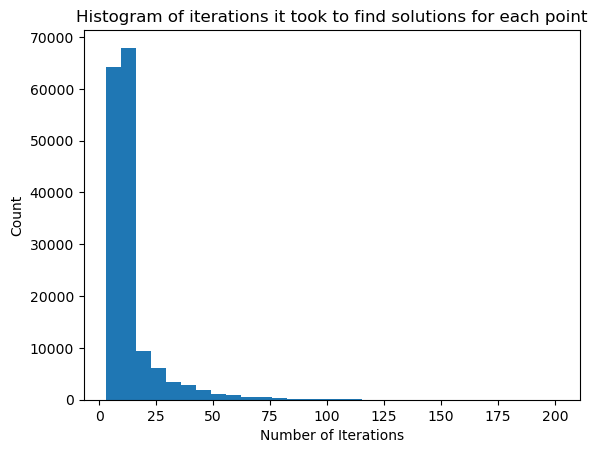

In [44]:
PyPlot.close()
hist(df2[!,5],bins=30)
plt.title("Histogram of iterations it took to find solutions for each point")
plt.ylabel("Count")
plt.xlabel("Number of Iterations")
gcf()
# show()

Below we plot the argument of all solutions on the complex plane. We see 9 major distinct regions of different solutions with the fractal patterns between them. This is expected for a $9^{th}$ order polynomial<br>

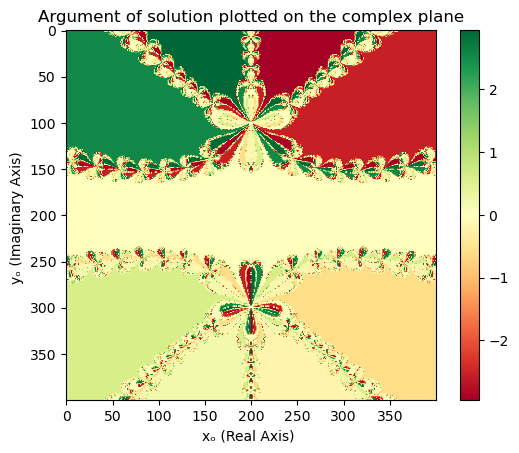

In [86]:
PyPlot.close()
imshow( reshape(angle.(df2[!,3]),(400,400)),cmap="RdYlGn")
xlabel("xₒ (Real Axis) ")
ylabel("yₒ (Imaginary Axis) ")
title("Argument of solution plotted on the complex plane")
colorbar()
gcf()
# show()

Having a closer look at the fractal pattern, we see that the inner regions converge to a completely different root than its neighbouring regoins. This is expected since near the boundary of two roots, the tangent is likely to be very flat, giving us a root from another region.<br>
![alt text](E2e9_M200_Zoom_Centre.png)


When plotting the interations it took to converge, we see that it takes longer to converge at the fractal boundaries. This is expexted as the flatter tangents send the function further from the root

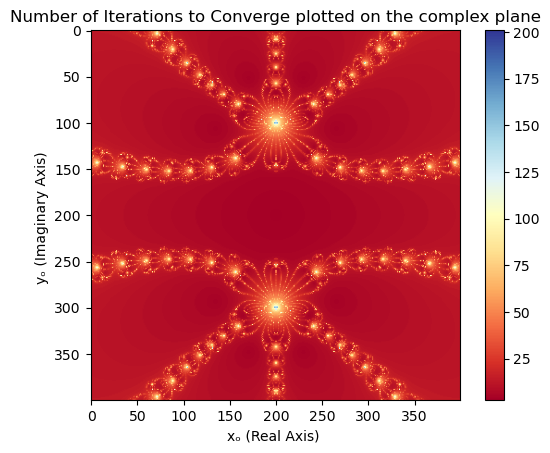

In [92]:
PyPlot.close()
imshow( reshape((df2[!,5]),(400,400)),cmap="RdYlBu")
xlabel("xₒ (Real Axis) ")
ylabel("yₒ (Imaginary Axis) ")
title("Number of Iterations to Converge plotted on the complex plane")
colorbar()
gcf()
# show()

At points close to (200,100i) and (200,300i) there are the four points that fail to converge in time
![alt text](Iter_E2e9_M200_Zoom_Centre.png)